# Assignment 2

# imports

In [1]:
import sklearn
import numpy as np
import pandas as pd

import graphviz
from sklearn import tree
from sklearn import naive_bayes, model_selection, metrics
from sklearn.impute import SimpleImputer
from io import StringIO
import csv

# Load Data

## “.names” describes the metadata 

In [2]:
with open("congressional+voting+records/house-votes-84.names", "rt") as fin: 
    for line in fin:              
        print(line.strip())
        
        
        

1. Title: 1984 United States Congressional Voting Records Database

2. Source Information:
(a) Source:  Congressional Quarterly Almanac, 98th Congress,
2nd session 1984, Volume XL: Congressional Quarterly Inc.
Washington, D.C., 1985.
(b) Donor: Jeff Schlimmer (Jeffrey.Schlimmer@a.gp.cs.cmu.edu)
(c) Date: 27 April 1987

3. Past Usage
- Publications
1. Schlimmer, J. C. (1987).  Concept acquisition through
representational adjustment.  Doctoral dissertation, Department of
Information and Computer Science, University of California, Irvine, CA.
-- Results: about 90%-95% accuracy appears to be STAGGER's asymptote
- Predicted attribute: party affiliation (2 classes)

4. Relevant Information:
This data set includes votes for each of the U.S. House of
Representatives Congressmen on the 16 key votes identified by the
CQA.  The CQA lists nine different types of votes: voted for, paired
for, and announced for (these three simplified to yea), voted
against, paired against, and announced against (th

## The actual data is in the “.data” suffix 

In [3]:
with open("congressional+voting+records/house-votes-84.data", "rt") as fin: 
    for line in fin:                
        print(line.strip())

republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y
democrat,n,y,y,n,y,y,n,n,n,n,n,n,y,y,y,y
democrat,n,y,n,y,y,y,n,n,n,n,n,n,?,y,y,y
republican,n,y,n,y,y,y,n,n,n,n,n,n,y,y,?,y
republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,y
democrat,y,y,y,n,n,n,y,y,y,n,n,n,n,n,?,?
republican,n,y,n,y,y,n,n,n,n,n,?,?,y,y,n,n
republican,n,y,n,y,y,y,n,n,n,n,y,?,y,y,?,?
democrat,n,y,y,n,n,n,y,y,y,n,n,n,y,n,?,?
democrat,y,y,y,n,n,y,y,y,?,y,y,?,n,n,y,?
republican,n,y,n,y,y,y,n,n,n,n,n,y,?,?,n,?
republican,n,y,n,y,y,y,n,n,n,y,n,y,y,?,n,?
democrat,y,n,y,n,n,y,n,y,?,y,y,y,?,n,n,y
democrat,y,?,y,n,n,n,y,y,y,n,n,n,y,n,y,y
republican,n,y,n,y,y,y,n,n,n,n,n,?,y,y,n,n
democrat,y,y,y,n,n,n,y,y,y,n,y,n,n,n,y,y
democrat,y,y,y,n,n,?,y,y,n,n,y,n,n,n,y,y
democrat,y,y,y,n,n,n,y,y,y,n,n,n,?,?,y,y
democrat,y,?,y,n,n,n,y,y,y,n,n,?,n,n,y,y
democrat,y,y,y,n,n,n,y,y,y,n,n,n,n,n,y,

# Data Preprocessing

In [4]:
data = pd.read_csv('congressional+voting+records/house-votes-84.data')
data.head()   # No good, format is messed up

,republican,n,y,n.1,y.1,y.2,y.3,n.2,n.3,n.4,y.4,?,y.5,y.6,y.7,n.5,y.8
0,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
1,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
2,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
3,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y
4,democrat,n,y,y,n,y,y,n,n,n,n,n,n,y,y,y,y


In [5]:
col_names = ["class-name", "handicapped-infants", "water-project-cost-sharing", "adoption-of-the-budget-resolution", 
"physician-fee-freeze", "el-salvador-aid", "religious-groups-in-schools", "anti-satellite-test-ban", "aid-to-nicaraguan-contras"
, "mx-missile", "immigration", "synfuels-corporation-cutback", "education-spending", "superfund-right-to-sue", "crime", "duty-free-exports", "export-administration-act-south-africa"]

n = 17
my_data = []

with open("congressional+voting+records/house-votes-84.data", "rt") as fin: 
    for line in fin:               
        line = line.replace("\n", "") 
        attributes = line.split(",")
        my_data.append(attributes)
        
my_data = np.array(my_data)
print(my_data)


[['republican' 'n' 'y' ... 'y' 'n' 'y']
 ['republican' 'n' 'y' ... 'y' 'n' '?']
 ['democrat' '?' 'y' ... 'y' 'n' 'n']
 ...
 ['republican' 'n' '?' ... 'y' 'n' 'y']
 ['republican' 'n' 'n' ... 'y' 'n' 'y']
 ['republican' 'n' 'y' ... 'y' '?' 'n']]


In [6]:
print(my_data.shape) 
# Number of Instances: 435, Number of Attributes: 17, matched with what .names said

(435, 17)


In [7]:
df = pd.DataFrame(data=my_data, columns=col_names)
df # Number of Instances: 435, Number of Attributes: 17, matched with what .names said

,class-name,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,republican,n,n,y,y,y,y,n,n,y,y,n,y,y,y,n,y
431,democrat,n,n,y,n,n,n,y,y,y,y,n,n,n,n,n,y
432,republican,n,?,n,y,y,y,n,n,n,n,y,y,y,y,n,y
433,republican,n,n,n,y,y,y,?,?,?,?,n,y,y,y,n,y


In [8]:
df = df.replace('?', pd.NaT) # Replace '?' to NaT

df = df.replace('n', 0)
df = df.replace('y', 1)

# 0 means democrat, 1 means reppublican
df = df.replace('republican', 0)
df = df.replace('democrat', 1)
df


,class-name,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,0,0,1,0,1,1,1,0,0,0,1,NaT,1,1,1,0,1
1,0,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,NaT
2,1,NaT,1,1,NaT,1,1,0,0,0,0,1,0,1,1,0,0
3,1,0,1,1,0,NaT,1,0,0,0,0,1,0,1,0,0,1
4,1,1,1,1,0,1,1,0,0,0,0,1,NaT,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,0,0,0,1,1,1,1,0,0,1,1,0,1,1,1,0,1
431,1,0,0,1,0,0,0,1,1,1,1,0,0,0,0,0,1
432,0,0,NaT,0,1,1,1,0,0,0,0,1,1,1,1,0,1
433,0,0,0,0,1,1,1,NaT,NaT,NaT,NaT,0,1,1,1,0,1


# i) Discard instances that have missing feature values

In [9]:
# Drop the rows where at least one element is missing.
df_drop_missing_element = df.dropna()
df_drop_missing_element
        

,class-name,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
5,1,0,1,1,0,1,1,0,0,0,0,0,0,1,1,1,1
8,0,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,1
19,1,1,1,1,0,0,0,1,1,1,0,1,0,0,0,1,1
23,1,1,1,1,0,0,0,1,1,1,0,0,0,0,0,1,1
25,1,1,0,1,0,0,0,1,1,1,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,1,0,1,1,0,0,1,1,1,1,0,1,0,0,1,1,1
426,1,1,0,1,0,0,0,1,1,1,1,0,0,0,0,1,1
427,0,0,0,0,1,1,1,1,1,0,1,0,1,1,1,0,1
430,0,0,0,1,1,1,1,0,0,1,1,0,1,1,1,0,1


### a) Decision trees

In [10]:
X = df_drop_missing_element.drop(['class-name'], axis=1)
y = df_drop_missing_element['class-name']
X = X.astype('int') # Tells numpy elements are integer, not just an object
y = y.astype('int') # Tells numpy elements are integer, not just an object

In [11]:
X.shape

(232, 16)

#### Train/Test Split 

In [12]:
(X_train, X_test, y_train, y_test) = model_selection.train_test_split(X, y, test_size=1/5.)
# 80/20 split

In [13]:
print(X.shape)

(232, 16)


In [14]:
print(X_train.shape, X_test.shape)

(185, 16) (47, 16)


#### DecisionTree Classifier

In [15]:
clf = tree.DecisionTreeClassifier(criterion="entropy")
clf

DecisionTreeClassifier(criterion='entropy')

In [16]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [17]:
ss = StringIO()

feature_names = X.columns
label_name = ["Republican", "Democrat"]

tree.export_graphviz(clf, feature_names=feature_names, class_names=label_name, label="all", out_file=ss)

In [18]:
ss.getvalue()

'digraph Tree {\nnode [shape=box, fontname="helvetica"] ;\nedge [fontname="helvetica"] ;\n0 [label="physician-fee-freeze <= 0.5\\nentropy = 0.998\\nsamples = 185\\nvalue = [88, 97]\\nclass = Democrat"] ;\n1 [label="adoption-of-the-budget-resolution <= 0.5\\nentropy = 0.087\\nsamples = 92\\nvalue = [1, 91]\\nclass = Democrat"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="religious-groups-in-schools <= 0.5\\nentropy = 0.371\\nsamples = 14\\nvalue = [1, 13]\\nclass = Democrat"] ;\n1 -> 2 ;\n3 [label="duty-free-exports <= 0.5\\nentropy = 0.811\\nsamples = 4\\nvalue = [1, 3]\\nclass = Democrat"] ;\n2 -> 3 ;\n4 [label="entropy = 0.0\\nsamples = 1\\nvalue = [1, 0]\\nclass = Republican"] ;\n3 -> 4 ;\n5 [label="entropy = 0.0\\nsamples = 3\\nvalue = [0, 3]\\nclass = Democrat"] ;\n3 -> 5 ;\n6 [label="entropy = 0.0\\nsamples = 10\\nvalue = [0, 10]\\nclass = Democrat"] ;\n2 -> 6 ;\n7 [label="entropy = 0.0\\nsamples = 78\\nvalue = [0, 78]\\nclass = Democrat"] ;\n1 -> 7

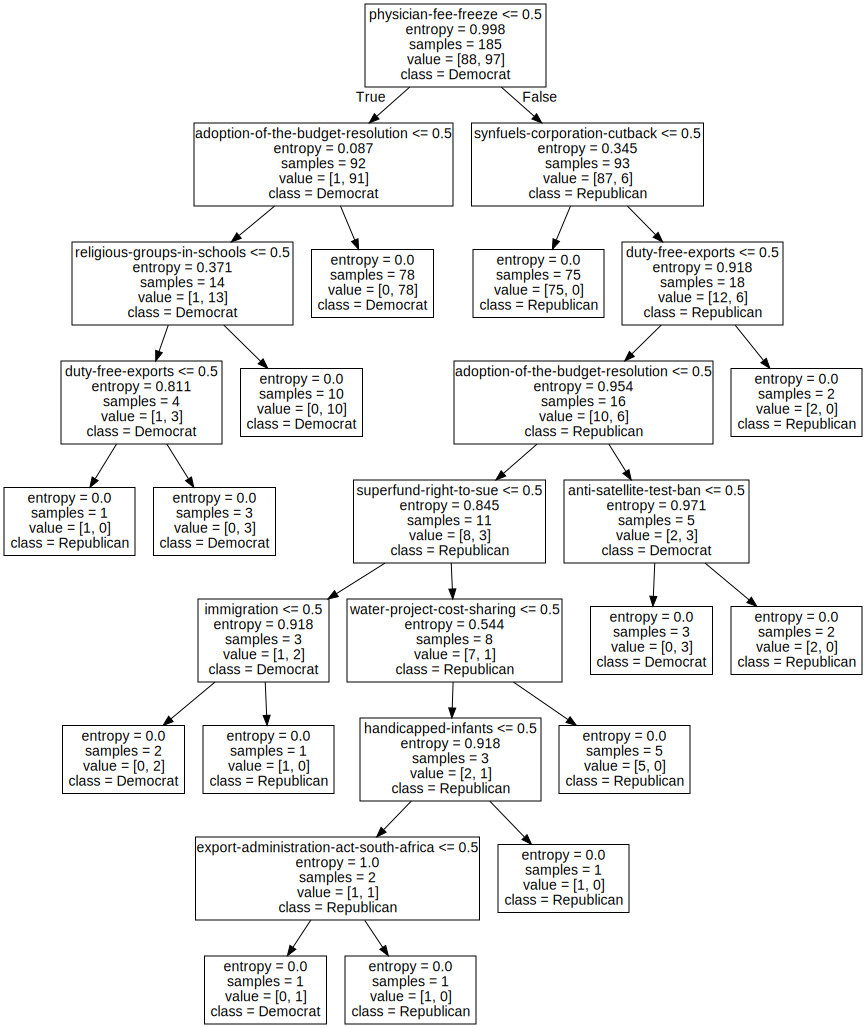

In [19]:
graphviz.Source(ss.getvalue())

#### Visualizing the Tree

In [20]:
y_pred = clf.predict(X_test)
print("predicted: ", y_pred) 
print("ground truth: ", y_test.values)

predicted:  [0 0 1 1 1 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 1 1 1 1 0 0 0 1 1 1 0 1 1 1 1 1 1
 0 1 0 1 1 0 0 1 1 1]
ground truth:  [0 0 1 1 1 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 1 1 1 1 0 0 0 1 1 1 0 1 1 1 1 1 1
 0 1 0 1 1 0 0 1 1 1]


In [21]:
metrics.precision_score(y_test, y_pred, average="weighted")

1.0

In [22]:
metrics.recall_score(y_test, y_pred, average="weighted")

1.0

In [23]:
metrics.f1_score(y_test, y_pred, average="weighted")

1.0

### 5-Fold Cross Validation 

In [24]:
kf = model_selection.KFold(n_splits=5, shuffle=True)
precision = np.array([])
recall = np.array([])
f1_score = np.array([])

for train_index, test_index in kf.split(df_drop_missing_element):
#     print(train_index[:5], test_index[:5])
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
  
    precision  = np.append(f1_score, metrics.precision_score(y_test, y_pred, average="weighted"))
    recall  = np.append(f1_score, metrics.recall_score(y_test, y_pred, average="weighted"))
    f1_score  = np.append(f1_score, metrics.f1_score(y_test, y_pred, average="weighted"))
      
#     print("precision_weight: ", metrics.precision_score(y_test, y_pred, average="weighted"))
#     print("recall: ", metrics.recall_score(y_test, y_pred, average="weighted"))
#     print("f1: ", metrics.f1_score(y_test, y_pred, average="weighted"))

print("Precision Weighted: ", np.mean(precision))  
print("Recall Weighted: ", np.mean(recall))
print("Test F1 Weighted: ", np.mean(f1_score))


Precision Weighted:  0.9443695270846678
Recall Weighted:  0.9437006307635978
Test F1 Weighted:  0.9436675044696019


In [25]:
# If using model_selection to do all 

scores = model_selection.cross_validate(clf, X, y, cv=5, scoring=["precision_weighted", "recall_weighted", 
                                                                  "f1_weighted"])
scores

{'fit_time': array([0.00099707, 0.00069976, 0.00061536, 0.00054979, 0.00062418]),
 'score_time': array([0.00219488, 0.00182199, 0.00165582, 0.00164199, 0.00178885]),
 'test_precision_weighted': array([0.96099291, 1.        , 0.97909699, 0.93536789, 0.89224953]),
 'test_recall_weighted': array([0.95744681, 1.        , 0.97826087, 0.93478261, 0.89130435]),
 'test_f1_weighted': array([0.95748535, 1.        , 0.97820889, 0.93462666, 0.89135574])}

In [26]:
# Result
print("Precision Weighted: ", np.mean(scores["test_precision_weighted"]))
print("Recall Weighted: ", np.mean(scores["test_recall_weighted"]))
print("Test F1 Wighted: ", np.mean(scores["test_f1_weighted"]))


Precision Weighted:  0.9535414636309539
Recall Weighted:  0.952358926919519
Test F1 Wighted:  0.9523353282860793


### b) Naïve Bayes classifier

In [27]:
df_drop_missing_element

,class-name,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
5,1,0,1,1,0,1,1,0,0,0,0,0,0,1,1,1,1
8,0,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,1
19,1,1,1,1,0,0,0,1,1,1,0,1,0,0,0,1,1
23,1,1,1,1,0,0,0,1,1,1,0,0,0,0,0,1,1
25,1,1,0,1,0,0,0,1,1,1,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,1,0,1,1,0,0,1,1,1,1,0,1,0,0,1,1,1
426,1,1,0,1,0,0,0,1,1,1,1,0,0,0,0,1,1
427,0,0,0,0,1,1,1,1,1,0,1,0,1,1,1,0,1
430,0,0,0,1,1,1,1,0,0,1,1,0,1,1,1,0,1


In [28]:
X = df_drop_missing_element.values[:, 1:] # Every instance, every column expect the first one
y = df_drop_missing_element.values[:, 0]



In [29]:
X = X.astype('int') # Tells numpy elements are integer, not just an object
X

array([[0, 1, 1, ..., 1, 1, 1],
       [0, 1, 0, ..., 1, 0, 1],
       [1, 1, 1, ..., 0, 1, 1],
       ...,
       [0, 0, 0, ..., 1, 0, 1],
       [0, 0, 1, ..., 1, 0, 1],
       [0, 0, 1, ..., 0, 0, 1]])

In [30]:
y = y.astype('int') # Tells numpy elements are integer, not just an object
y

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1])

In [31]:
(X_train, X_test, y_train, y_test) = model_selection.train_test_split(X, y, test_size=1/5.)

In [32]:
clf = naive_bayes.BernoulliNB()
clf.fit(X, y)

BernoulliNB()

In [33]:
y_pred = clf.predict(X_test)
print("predicted: ", y_pred) 
print("ground truth: ", y_test)

predicted:  [0 1 1 1 0 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 0 0 0 1 1 1 0 0 1 1 0 1 1 0 0 1 1
 1 1 1 0 1 1 1 0 0 0]
ground truth:  [0 1 1 1 0 0 1 1 0 1 1 1 1 0 0 0 1 0 0 1 0 0 0 1 1 1 0 0 1 1 0 1 1 1 0 1 1
 1 1 1 0 1 1 1 0 0 0]


In [34]:
clf.predict_proba(X_test)

array([[9.99999989e-01, 1.07263894e-08],
       [5.29676990e-10, 9.99999999e-01],
       [5.51043157e-10, 9.99999999e-01],
       [1.04443642e-10, 1.00000000e+00],
       [9.99999591e-01, 4.08921415e-07],
       [9.48211331e-01, 5.17886693e-02],
       [1.09023264e-09, 9.99999999e-01],
       [5.65905597e-07, 9.99999434e-01],
       [3.32619813e-01, 6.67380187e-01],
       [1.01989818e-07, 9.99999898e-01],
       [3.86903966e-06, 9.99996131e-01],
       [1.18574007e-09, 9.99999999e-01],
       [9.93572843e-11, 1.00000000e+00],
       [6.05305150e-01, 3.94694850e-01],
       [9.99999577e-01, 4.23085235e-07],
       [9.99999257e-01, 7.42664081e-07],
       [1.13352628e-10, 1.00000000e+00],
       [1.15485045e-01, 8.84514955e-01],
       [3.36230720e-05, 9.99966377e-01],
       [3.55593627e-02, 9.64440637e-01],
       [9.99999943e-01, 5.65922739e-08],
       [9.99980794e-01, 1.92056534e-05],
       [9.99999943e-01, 5.65922739e-08],
       [1.08061260e-10, 1.00000000e+00],
       [2.048171

In [35]:
metrics.precision_score(y_test, y_pred, average="weighted")

0.9169316051194262

In [36]:
metrics.recall_score(y_test, y_pred, average="weighted")

0.9148936170212766

In [37]:
metrics.f1_score(y_test, y_pred, average="weighted")

0.9141737322028476

### 5-Fold Validation

In [38]:
scores = model_selection.cross_validate(clf, X, y, cv=5, scoring=["precision_weighted", "recall_weighted", 
                                                                  "f1_weighted"])
scores

{'fit_time': array([0.0009079 , 0.00045729, 0.00039411, 0.00033116, 0.00032306]),
 'score_time': array([0.00178504, 0.00142288, 0.00133395, 0.00128365, 0.00130892]),
 'test_precision_weighted': array([0.90092843, 0.83310207, 0.97909699, 1.        , 0.8819398 ]),
 'test_recall_weighted': array([0.89361702, 0.82978723, 0.97826087, 1.        , 0.86956522]),
 'test_f1_weighted': array([0.89361702, 0.82994141, 0.97820889, 1.        , 0.86907115])}

In [39]:
# Result
print("Precision Weighted: ", np.mean(scores["test_precision_weighted"]))
print("Recall Weighted: ", np.mean(scores["test_recall_weighted"]))
print("Test F1 Wighted: ", np.mean(scores["test_f1_weighted"]))


Precision Weighted:  0.91901345771096
Recall Weighted:  0.9142460684551341
Test F1 Wighted:  0.9141676933484894


# ii) Treat "missing" as if it is a value

In [40]:
df_fill_missing_element = df
df_fill_missing_element = df_fill_missing_element.fillna(-1) # Fill the nan with a number -1, so it is a three-valued feature
# df_fill_missing_element


In [41]:
df_fill_missing_element

,class-name,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,0,0,1,0,1,1,1,0,0,0,1,-1,1,1,1,0,1
1,0,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,-1
2,1,-1,1,1,-1,1,1,0,0,0,0,1,0,1,1,0,0
3,1,0,1,1,0,-1,1,0,0,0,0,1,0,1,0,0,1
4,1,1,1,1,0,1,1,0,0,0,0,1,-1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,0,0,0,1,1,1,1,0,0,1,1,0,1,1,1,0,1
431,1,0,0,1,0,0,0,1,1,1,1,0,0,0,0,0,1
432,0,0,-1,0,1,1,1,0,0,0,0,1,1,1,1,0,1
433,0,0,0,0,1,1,1,-1,-1,-1,-1,0,1,1,1,0,1


### Decision Tree 

In [42]:
X = df_fill_missing_element.drop(['class-name'], axis=1)
y = df_fill_missing_element['class-name']

X = X.astype('int') # Tells numpy elements are integer, not just an object
y = y.astype('int') # Tells numpy elements are integer, not just an object

X.shape

(435, 16)

#### Train/Test Split 

In [43]:
(X_train, X_test, y_train, y_test) = model_selection.train_test_split(X, y, test_size=1/5.)
# 80/20 split

In [44]:
print(X.shape)

(435, 16)


In [45]:
print(X_train.shape, X_test.shape)

(348, 16) (87, 16)


#### DecisionTree Classifier

In [46]:
clf = tree.DecisionTreeClassifier(criterion="entropy")
clf

DecisionTreeClassifier(criterion='entropy')

In [47]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [48]:
ss = StringIO()

feature_names = X.columns
label_name = ["Republican", "Democrat"]

tree.export_graphviz(clf, feature_names=feature_names, class_names=label_name, label="all", out_file=ss)

In [49]:
ss.getvalue()

'digraph Tree {\nnode [shape=box, fontname="helvetica"] ;\nedge [fontname="helvetica"] ;\n0 [label="physician-fee-freeze <= 0.5\\nentropy = 0.958\\nsamples = 348\\nvalue = [132, 216]\\nclass = Democrat"] ;\n1 [label="adoption-of-the-budget-resolution <= 0.5\\nentropy = 0.164\\nsamples = 208\\nvalue = [5, 203]\\nclass = Democrat"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="education-spending <= -0.5\\nentropy = 0.663\\nsamples = 29\\nvalue = [5, 24]\\nclass = Democrat"] ;\n1 -> 2 ;\n3 [label="entropy = 0.0\\nsamples = 3\\nvalue = [3, 0]\\nclass = Republican"] ;\n2 -> 3 ;\n4 [label="synfuels-corporation-cutback <= 0.5\\nentropy = 0.391\\nsamples = 26\\nvalue = [2, 24]\\nclass = Democrat"] ;\n2 -> 4 ;\n5 [label="physician-fee-freeze <= -0.5\\nentropy = 0.684\\nsamples = 11\\nvalue = [2, 9]\\nclass = Democrat"] ;\n4 -> 5 ;\n6 [label="entropy = 0.0\\nsamples = 1\\nvalue = [1, 0]\\nclass = Republican"] ;\n5 -> 6 ;\n7 [label="religious-groups-in-schools <= 0.5

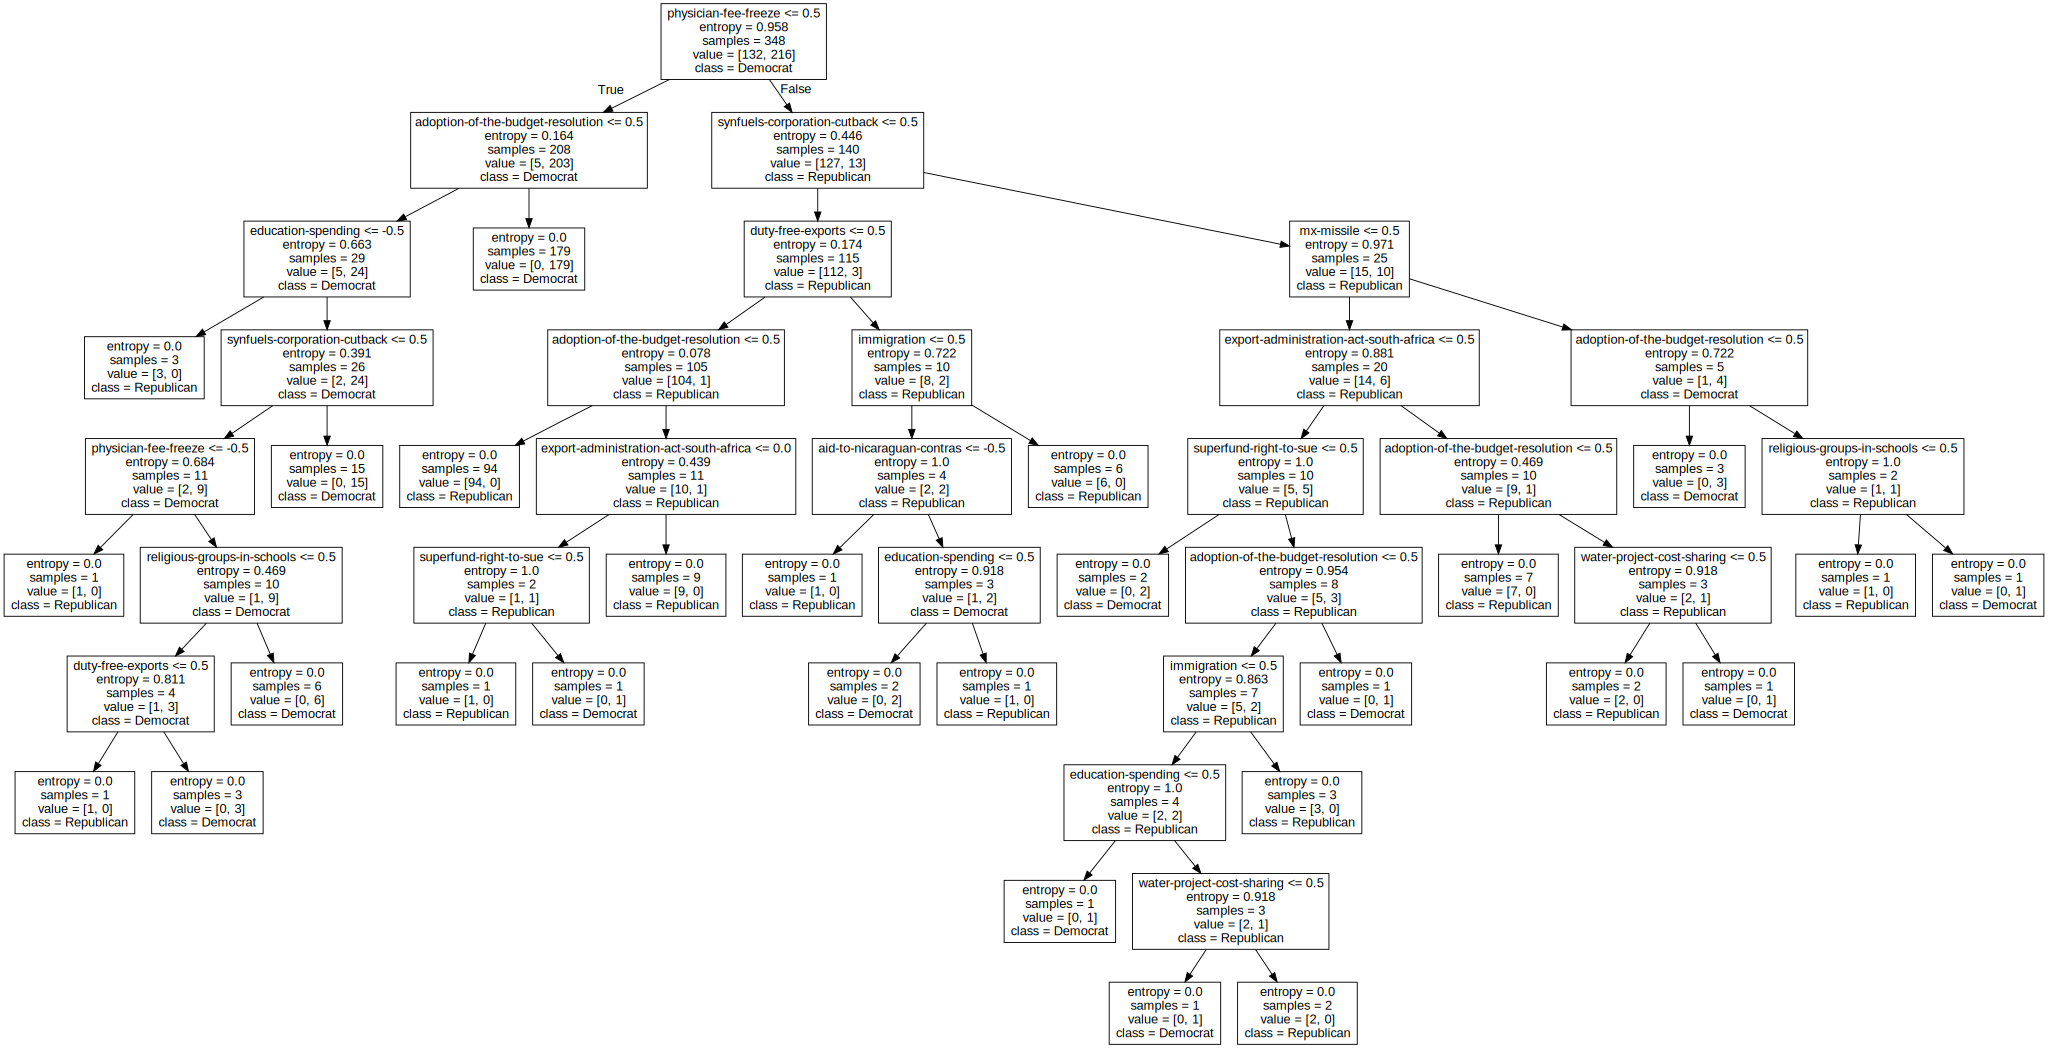

In [50]:
graphviz.Source(ss.getvalue())

#### Visualizing the Tree

In [51]:
y_pred = clf.predict(X_test)
print("predicted: ", y_pred) 
print("ground truth: ", y_test.values)

predicted:  [1 0 1 0 1 1 1 0 1 1 0 0 1 0 1 0 0 0 0 1 1 1 0 1 1 0 0 0 1 0 1 1 1 1 1 1 0
 0 1 1 1 1 1 0 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 0 0 0 0 0 0 1 0 0
 1 0 0 1 1 1 1 0 1 0 1 0 1]
ground truth:  [1 0 1 0 1 1 1 0 1 1 0 0 1 0 1 0 0 0 1 1 1 1 0 1 1 0 0 1 1 0 1 1 1 1 1 1 0
 0 1 1 1 1 1 0 0 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 0 0 0 0 0 0 1 0 0
 1 0 0 1 1 1 1 0 1 0 0 0 1]


In [52]:
metrics.precision_score(y_test, y_pred, average="weighted")

0.9540229885057471

In [53]:
metrics.recall_score(y_test, y_pred, average="weighted")

0.9540229885057471

In [54]:
metrics.f1_score(y_test, y_pred, average="weighted")

0.9540229885057471

### 5-Fold Cross Validation 

In [55]:
kf = model_selection.KFold(n_splits=5, shuffle=True)
precision = np.array([])
recall = np.array([])
f1_score = np.array([])

for train_index, test_index in kf.split(df_drop_missing_element):
#     print(train_index[:5], test_index[:5])
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
  
    precision  = np.append(f1_score, metrics.precision_score(y_test, y_pred, average="weighted"))
    recall  = np.append(f1_score, metrics.recall_score(y_test, y_pred, average="weighted"))
    f1_score  = np.append(f1_score, metrics.f1_score(y_test, y_pred, average="weighted"))
      
#     print("precision_weight: ", metrics.precision_score(y_test, y_pred, average="weighted"))
#     print("recall: ", metrics.recall_score(y_test, y_pred, average="weighted"))
#     print("f1: ", metrics.f1_score(y_test, y_pred, average="weighted"))

print("Precision Weighted: ", np.mean(precision))  
print("Recall Weighted: ", np.mean(recall))
print("Test F1 Weighted: ", np.mean(f1_score))


Precision Weighted:  0.961434491084294
Recall Weighted:  0.9610729071703685
Test F1 Weighted:  0.9611599976775033


In [56]:
# If using model_selection to do all 

scores = model_selection.cross_validate(clf, X, y, cv=5, scoring=["precision_weighted", "recall_weighted", 
                                                                  "f1_weighted"])
scores

{'fit_time': array([0.00146508, 0.00083089, 0.00071716, 0.00098825, 0.00067902]),
 'score_time': array([0.00213909, 0.00184298, 0.00167584, 0.0020349 , 0.00167584]),
 'test_precision_weighted': array([0.96559464, 0.94989685, 0.96559464, 0.89615987, 0.93632805]),
 'test_recall_weighted': array([0.96551724, 0.94252874, 0.96551724, 0.89655172, 0.93103448]),
 'test_f1_weighted': array([0.96542104, 0.94307437, 0.96542104, 0.8962305 , 0.93167867])}

In [57]:
# Result
print("Precision Weighted: ", np.mean(scores["test_precision_weighted"]))
print("Recall Weighted: ", np.mean(scores["test_recall_weighted"]))
print("Test F1 Wighted: ", np.mean(scores["test_f1_weighted"]))


Precision Weighted:  0.9427148121515938
Recall Weighted:  0.9402298850574713
Test F1 Wighted:  0.9403651249534073


### b) Naïve Bayes classifier

In [58]:
df_fill_missing_element

,class-name,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,0,0,1,0,1,1,1,0,0,0,1,-1,1,1,1,0,1
1,0,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,-1
2,1,-1,1,1,-1,1,1,0,0,0,0,1,0,1,1,0,0
3,1,0,1,1,0,-1,1,0,0,0,0,1,0,1,0,0,1
4,1,1,1,1,0,1,1,0,0,0,0,1,-1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,0,0,0,1,1,1,1,0,0,1,1,0,1,1,1,0,1
431,1,0,0,1,0,0,0,1,1,1,1,0,0,0,0,0,1
432,0,0,-1,0,1,1,1,0,0,0,0,1,1,1,1,0,1
433,0,0,0,0,1,1,1,-1,-1,-1,-1,0,1,1,1,0,1


In [59]:
X = df_fill_missing_element.values[:, 1:] # Every instance, every column expect the first one
y = df_fill_missing_element.values[:, 0]



In [60]:
X = X.astype('int') # Tells numpy elements are integer, not just an object
X

array([[ 0,  1,  0, ...,  1,  0,  1],
       [ 0,  1,  0, ...,  1,  0, -1],
       [-1,  1,  1, ...,  1,  0,  0],
       ...,
       [ 0, -1,  0, ...,  1,  0,  1],
       [ 0,  0,  0, ...,  1,  0,  1],
       [ 0,  1,  0, ...,  1, -1,  0]])

In [61]:
y = y.astype('int') # Tells numpy elements are integer, not just an object
y

array([0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,

In [62]:
(X_train, X_test, y_train, y_test) = model_selection.train_test_split(X, y, test_size=1/5.)

In [63]:
clf = naive_bayes.BernoulliNB()
clf.fit(X, y)

BernoulliNB()

In [64]:
# clf.predict(X[-20:, :]) # The last 20 instances


y_pred = clf.predict(X_test)
print("predicted: ", y_pred) 
print("ground truth: ", y_test)

predicted:  [0 1 1 1 1 1 0 1 0 1 0 1 0 1 0 0 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 0 1 0 0 1 1
 0 1 1 0 0 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 0 1
 1 1 0 1 0 0 0 1 0 0 1 0 0]
ground truth:  [0 1 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 1 0 1 1 1 0 1 1 1 1 0 0 1 0 0 1 0 0 1 1
 0 1 1 0 0 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 1
 1 1 0 1 0 0 0 1 0 0 1 0 0]


In [65]:
clf.predict_proba(X_test)

array([[9.99998762e-01, 1.23838999e-06],
       [3.83798535e-08, 9.99999962e-01],
       [3.96511362e-11, 1.00000000e+00],
       [2.46709178e-10, 1.00000000e+00],
       [3.43874516e-10, 1.00000000e+00],
       [2.38194500e-06, 9.99997618e-01],
       [9.99999009e-01, 9.90969555e-07],
       [3.80038736e-09, 9.99999996e-01],
       [9.98050763e-01, 1.94923675e-03],
       [1.71463582e-03, 9.98285364e-01],
       [9.99999917e-01, 8.30442496e-08],
       [5.51696640e-11, 1.00000000e+00],
       [9.99999887e-01, 1.13200515e-07],
       [5.23847208e-09, 9.99999995e-01],
       [9.99999498e-01, 5.02018961e-07],
       [9.99816772e-01, 1.83227837e-04],
       [1.63829105e-04, 9.99836171e-01],
       [1.32263964e-08, 9.99999987e-01],
       [9.99999918e-01, 8.21242940e-08],
       [9.94303601e-03, 9.90056964e-01],
       [9.32515815e-09, 9.99999991e-01],
       [9.66708424e-10, 9.99999999e-01],
       [9.99999886e-01, 1.14265819e-07],
       [2.25164761e-02, 9.77483524e-01],
       [4.597141

In [66]:
metrics.precision_score(y_test, y_pred, average="weighted")

0.9540229885057471

In [67]:
metrics.recall_score(y_test, y_pred, average="weighted")

0.9540229885057471

In [68]:
metrics.f1_score(y_test, y_pred, average="weighted")

0.9540229885057471

### 5-Fold Validation

In [69]:
scores = model_selection.cross_validate(clf, X, y, cv=5, scoring=["precision_weighted", "recall_weighted", 
                                                                  "f1_weighted"])
scores

{'fit_time': array([0.00068402, 0.00046825, 0.00037885, 0.00043321, 0.00042176]),
 'score_time': array([0.00159383, 0.00140285, 0.00139904, 0.00142789, 0.00129318]),
 'test_precision_weighted': array([0.91864759, 0.86495167, 0.94387944, 0.95402299, 0.842865  ]),
 'test_recall_weighted': array([0.90804598, 0.85057471, 0.94252874, 0.95402299, 0.82758621]),
 'test_f1_weighted': array([0.90901522, 0.85226518, 0.94199336, 0.95402299, 0.82987789])}

In [70]:
# Result
print("Precision Weighted: ", np.mean(scores["test_precision_weighted"]))
print("Recall Weighted: ", np.mean(scores["test_recall_weighted"]))
print("Test F1 Wighted: ", np.mean(scores["test_f1_weighted"]))


Precision Weighted:  0.9048733393091
Recall Weighted:  0.8965517241379312
Test F1 Wighted:  0.8974349284079397


## iii) Impute missing values (for each feature, replace missing values with the most common value for that feature) 

In [71]:
df

,class-name,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,0,0,1,0,1,1,1,0,0,0,1,NaT,1,1,1,0,1
1,0,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,NaT
2,1,NaT,1,1,NaT,1,1,0,0,0,0,1,0,1,1,0,0
3,1,0,1,1,0,NaT,1,0,0,0,0,1,0,1,0,0,1
4,1,1,1,1,0,1,1,0,0,0,0,1,NaT,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,0,0,0,1,1,1,1,0,0,1,1,0,1,1,1,0,1
431,1,0,0,1,0,0,0,1,1,1,1,0,0,0,0,0,1
432,0,0,NaT,0,1,1,1,0,0,0,0,1,1,1,1,0,1
433,0,0,0,0,1,1,1,NaT,NaT,NaT,NaT,0,1,1,1,0,1


In [72]:
# Imputate the missing values using SimpleImputer from sklearn

imp = SimpleImputer(missing_values=pd.NA, strategy='most_frequent')

df_impute_missing_element = df
df_impute_missing_element = pd.DataFrame(imp.fit_transform(df_impute_missing_element)) 
df_impute_missing_element.index = df.index
df_impute_missing_element.columns = df.columns
df_impute_missing_element


,class-name,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,0,0,1,0,1,1,1,0,0,0,1,0,1,1,1,0,1
1,0,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,1
2,1,0,1,1,0,1,1,0,0,0,0,1,0,1,1,0,0
3,1,0,1,1,0,1,1,0,0,0,0,1,0,1,0,0,1
4,1,1,1,1,0,1,1,0,0,0,0,1,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,0,0,0,1,1,1,1,0,0,1,1,0,1,1,1,0,1
431,1,0,0,1,0,0,0,1,1,1,1,0,0,0,0,0,1
432,0,0,1,0,1,1,1,0,0,0,0,1,1,1,1,0,1
433,0,0,0,0,1,1,1,1,1,1,1,0,1,1,1,0,1


### a) Decision trees

In [73]:
X = df_impute_missing_element.drop(['class-name'], axis=1)
y = df_impute_missing_element['class-name']

X = X.astype('int') # Tells numpy elements are integer, not just an object
y = y.astype('int') # Tells numpy elements are integer, not just an object

In [74]:
X.shape

(435, 16)

#### Train/Test Split 

In [75]:
(X_train, X_test, y_train, y_test) = model_selection.train_test_split(X, y, test_size=1/5.)
# 80/20 split

In [76]:
print(X.shape)

(435, 16)


In [77]:
print(X_train.shape, X_test.shape)

(348, 16) (87, 16)


#### DecisionTree Classifier

In [78]:
clf = tree.DecisionTreeClassifier(criterion="entropy")
clf

DecisionTreeClassifier(criterion='entropy')

In [79]:

clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [80]:
ss = StringIO()

feature_names = X.columns
label_name = ["Republican", "Democrat"]

tree.export_graphviz(clf, feature_names=feature_names, class_names=label_name, label="all", out_file=ss)

In [81]:
ss.getvalue()

'digraph Tree {\nnode [shape=box, fontname="helvetica"] ;\nedge [fontname="helvetica"] ;\n0 [label="physician-fee-freeze <= 0.5\\nentropy = 0.962\\nsamples = 348\\nvalue = [134, 214]\\nclass = Democrat"] ;\n1 [label="duty-free-exports <= 0.5\\nentropy = 0.137\\nsamples = 209\\nvalue = [4, 205]\\nclass = Democrat"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="synfuels-corporation-cutback <= 0.5\\nentropy = 0.274\\nsamples = 85\\nvalue = [4, 81]\\nclass = Democrat"] ;\n1 -> 2 ;\n3 [label="superfund-right-to-sue <= 0.5\\nentropy = 0.433\\nsamples = 45\\nvalue = [4, 41]\\nclass = Democrat"] ;\n2 -> 3 ;\n4 [label="adoption-of-the-budget-resolution <= 0.5\\nentropy = 0.211\\nsamples = 30\\nvalue = [1, 29]\\nclass = Democrat"] ;\n3 -> 4 ;\n5 [label="el-salvador-aid <= 0.5\\nentropy = 1.0\\nsamples = 2\\nvalue = [1, 1]\\nclass = Republican"] ;\n4 -> 5 ;\n6 [label="entropy = 0.0\\nsamples = 1\\nvalue = [1, 0]\\nclass = Republican"] ;\n5 -> 6 ;\n7 [label="entropy =

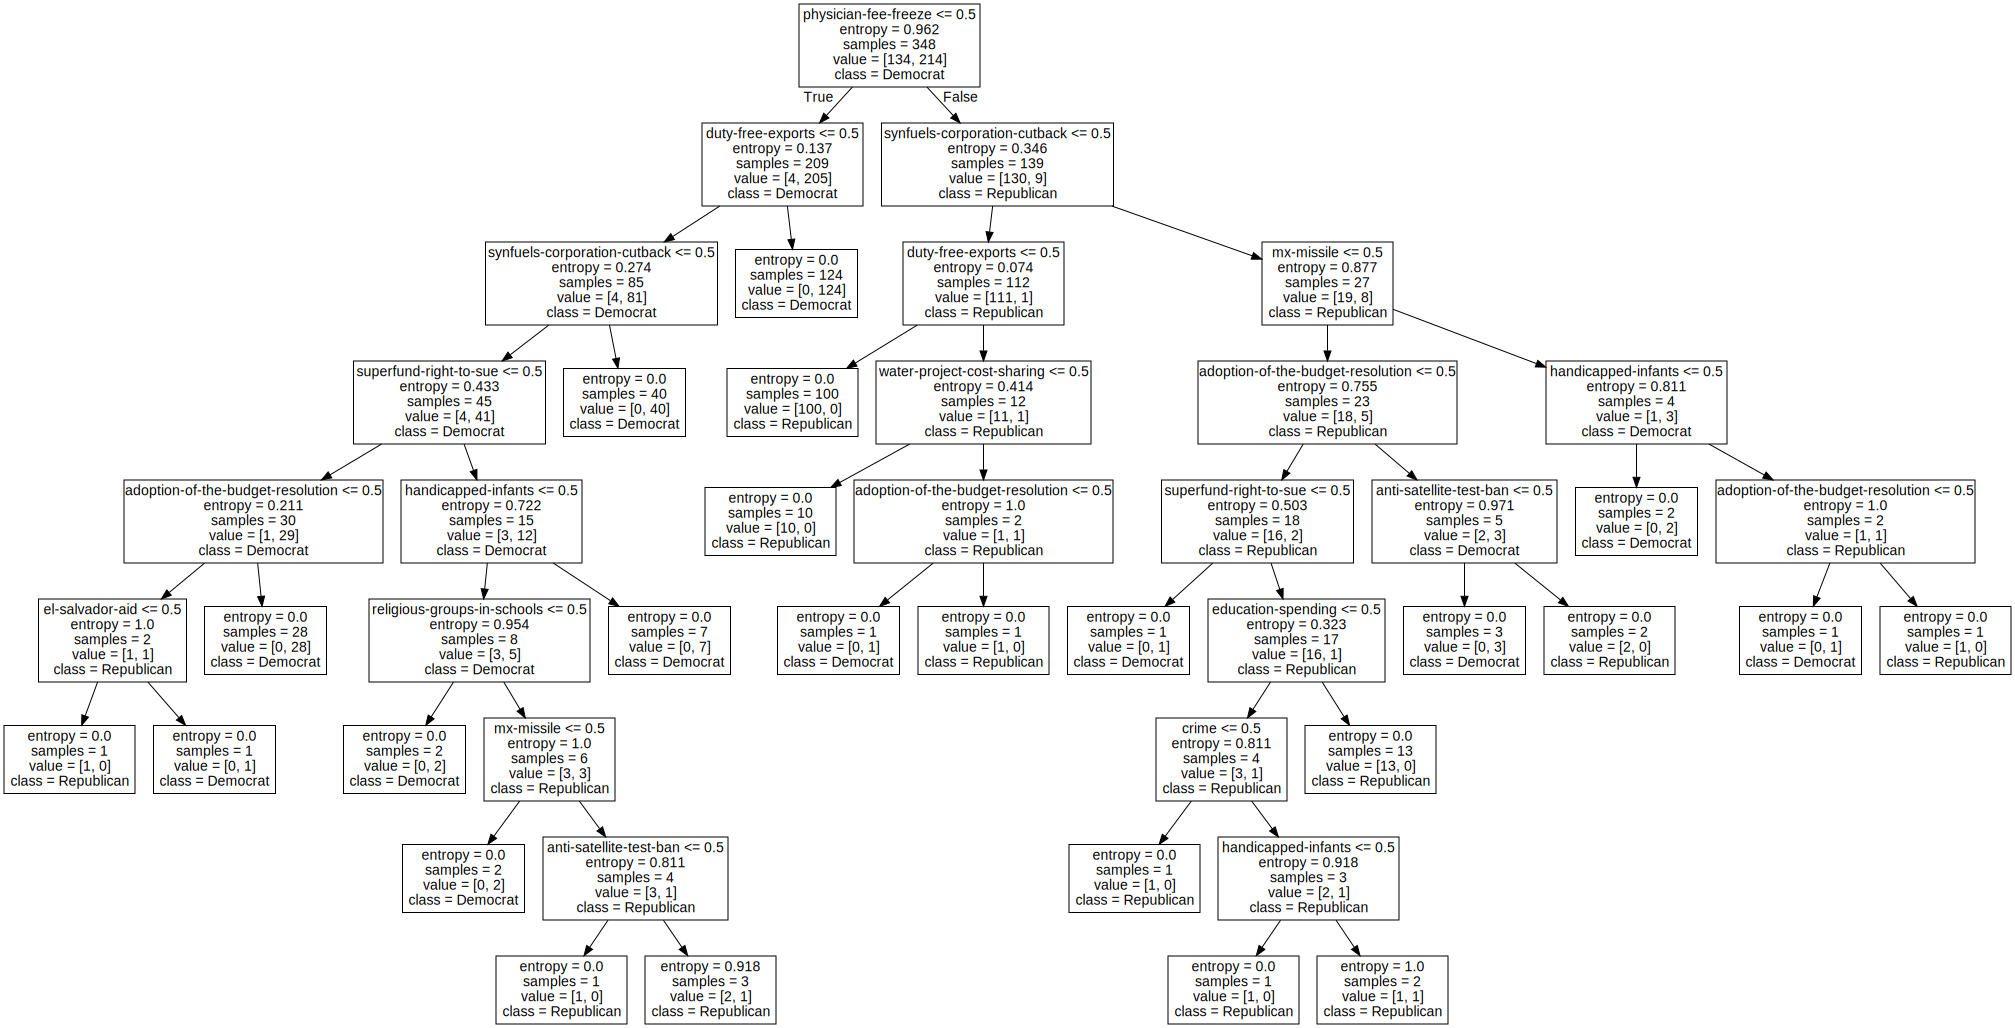

In [82]:
graphviz.Source(ss.getvalue())

#### Visualizing the Tree

In [83]:
y_pred = clf.predict(X_test)
print("predicted: ", y_pred) 
print("ground truth: ", y_test.values)

predicted:  [1 0 1 1 1 1 0 0 1 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 0 1 0 1 1 0 1 1 0 0 1 1 0
 1 0 1 0 1 0 1 0 1 0 0 1 1 1 1 1 1 0 1 0 0 0 1 1 1 1 0 1 0 1 0 0 0 0 0 0 1
 1 0 1 0 1 0 1 0 0 0 1 1 0]
ground truth:  [1 0 1 1 1 1 0 0 1 0 0 0 0 0 0 1 1 1 1 1 1 1 0 1 0 1 0 1 1 0 1 1 0 0 1 1 0
 1 0 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 0 1 0 1 1 0 0 1 1
 1 0 1 1 1 0 1 0 0 0 1 1 0]


In [84]:
metrics.precision_score(y_test, y_pred, average="weighted")

0.8877268682731806

In [85]:
metrics.recall_score(y_test, y_pred, average="weighted")

0.8735632183908046

In [86]:
metrics.f1_score(y_test, y_pred, average="weighted")

0.8749936143039592

### 5-Fold Cross Validation 

In [87]:
kf = model_selection.KFold(n_splits=5, shuffle=True)
precision = np.array([])
recall = np.array([])
f1_score = np.array([])

for train_index, test_index in kf.split(df_drop_missing_element):
#     print(train_index[:5], test_index[:5])
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
  
    precision  = np.append(f1_score, metrics.precision_score(y_test, y_pred, average="weighted"))
    recall  = np.append(f1_score, metrics.recall_score(y_test, y_pred, average="weighted"))
    f1_score  = np.append(f1_score, metrics.f1_score(y_test, y_pred, average="weighted"))
      
#     print("precision_weight: ", metrics.precision_score(y_test, y_pred, average="weighted"))
#     print("recall: ", metrics.recall_score(y_test, y_pred, average="weighted"))
#     print("f1: ", metrics.f1_score(y_test, y_pred, average="weighted"))

print("Precision Weighted: ", np.mean(precision))  
print("Recall Weighted: ", np.mean(recall))
print("Test F1 Weighted: ", np.mean(f1_score))


Precision Weighted:  0.9574292631436776
Recall Weighted:  0.9569022539210161
Test F1 Weighted:  0.9567275644800224


In [88]:
# If using model_selection to do all 

scores = model_selection.cross_validate(clf, X, y, cv=5, scoring=["precision_weighted", "recall_weighted", 
                                                                  "f1_weighted"])
scores

{'fit_time': array([0.00166082, 0.00079703, 0.00078511, 0.00078011, 0.00088978]),
 'score_time': array([0.00216317, 0.00200295, 0.0018599 , 0.002455  , 0.00221014]),
 'test_precision_weighted': array([0.97701149, 0.96831314, 0.96559464, 0.94379915, 0.93277757]),
 'test_recall_weighted': array([0.97701149, 0.96551724, 0.96551724, 0.94252874, 0.93103448]),
 'test_f1_weighted': array([0.97701149, 0.96574357, 0.96542104, 0.94193701, 0.93139806])}

In [89]:
# Result
print("Precision Weighted: ", np.mean(scores["test_precision_weighted"]))
print("Recall Weighted: ", np.mean(scores["test_recall_weighted"]))
print("Test F1 Wighted: ", np.mean(scores["test_f1_weighted"]))


Precision Weighted:  0.9574991998101495
Recall Weighted:  0.9563218390804599
Test F1 Wighted:  0.9563022369246937


### b) Naïve Bayes classifier

In [90]:
df_impute_missing_element

,class-name,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,0,0,1,0,1,1,1,0,0,0,1,0,1,1,1,0,1
1,0,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,1
2,1,0,1,1,0,1,1,0,0,0,0,1,0,1,1,0,0
3,1,0,1,1,0,1,1,0,0,0,0,1,0,1,0,0,1
4,1,1,1,1,0,1,1,0,0,0,0,1,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,0,0,0,1,1,1,1,0,0,1,1,0,1,1,1,0,1
431,1,0,0,1,0,0,0,1,1,1,1,0,0,0,0,0,1
432,0,0,1,0,1,1,1,0,0,0,0,1,1,1,1,0,1
433,0,0,0,0,1,1,1,1,1,1,1,0,1,1,1,0,1


In [91]:
X = df_impute_missing_element.values[:, 1:] # Every instance, every column expect the first one
y = df_impute_missing_element.values[:, 0]



In [92]:
X = X.astype('int') # Tells numpy elements are integer, not just an object
X

array([[0, 1, 0, ..., 1, 0, 1],
       [0, 1, 0, ..., 1, 0, 1],
       [0, 1, 1, ..., 1, 0, 0],
       ...,
       [0, 1, 0, ..., 1, 0, 1],
       [0, 0, 0, ..., 1, 0, 1],
       [0, 1, 0, ..., 1, 0, 0]])

In [93]:
y = y.astype('int') # Tells numpy elements are integer, not just an object
y

array([0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,

In [94]:
(X_train, X_test, y_train, y_test) = model_selection.train_test_split(X, y, test_size=1/5.)

In [95]:
clf = naive_bayes.BernoulliNB()
clf.fit(X, y)

BernoulliNB()

In [96]:
y_pred = clf.predict(X_test)
print("predicted: ", y_pred) 
print("ground truth: ", y_test)

predicted:  [1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 0 0 0 1 1 1 1 0 0 1 1 1 0 1 1 1 0 0
 1 0 0 0 1 0 1 0 0 1 1 1 1 1 1 0 1 0 1 0 0 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 1 1 0 0 1 0 0 1 0 1 0 0]
ground truth:  [0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 0 0 1 1 0 1 0 0 1 1 0 0 1 1 1 0 0
 1 0 0 1 1 0 1 1 0 1 1 0 1 1 1 0 1 0 0 0 0 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 1 1 0 0 1 0 0 1 0 1 0 0]


In [97]:
clf.predict_proba(X_test)

array([[1.58579130e-01, 8.41420870e-01],
       [8.61874695e-11, 1.00000000e+00],
       [9.84816641e-01, 1.51833589e-02],
       [7.33555041e-10, 9.99999999e-01],
       [1.09926182e-01, 8.90073818e-01],
       [8.61874695e-11, 1.00000000e+00],
       [4.91942153e-09, 9.99999995e-01],
       [9.99536883e-01, 4.63117251e-04],
       [1.12999172e-08, 9.99999989e-01],
       [6.87468576e-05, 9.99931253e-01],
       [7.49346387e-04, 9.99250654e-01],
       [2.24315629e-05, 9.99977568e-01],
       [2.67460116e-05, 9.99973254e-01],
       [9.89851099e-01, 1.01489012e-02],
       [1.16141513e-10, 1.00000000e+00],
       [1.66537765e-10, 1.00000000e+00],
       [4.98678192e-10, 1.00000000e+00],
       [9.99999979e-01, 2.09323949e-08],
       [1.16141513e-10, 1.00000000e+00],
       [9.99999868e-01, 1.31700207e-07],
       [9.99995759e-01, 4.24080864e-06],
       [9.99990011e-01, 9.98910097e-06],
       [2.11017806e-10, 1.00000000e+00],
       [3.01485255e-04, 9.99698515e-01],
       [2.109314

In [98]:
metrics.precision_score(y_test, y_pred, average="weighted")

0.8730988041332869

In [99]:
metrics.recall_score(y_test, y_pred, average="weighted")

0.8735632183908046

In [100]:
metrics.f1_score(y_test, y_pred, average="weighted")

0.8732104864013802

### 5-Fold Validation

In [101]:
scores = model_selection.cross_validate(clf, X, y, cv=5, scoring=["precision_weighted", "recall_weighted", 
                                                                  "f1_weighted"])
scores

{'fit_time': array([0.00098372, 0.0004313 , 0.00036025, 0.00035191, 0.00034714]),
 'score_time': array([0.00163937, 0.00132871, 0.00128675, 0.00127792, 0.00131702]),
 'test_precision_weighted': array([0.91342889, 0.87318415, 0.94387944, 0.9659765 , 0.85775405]),
 'test_recall_weighted': array([0.90804598, 0.86206897, 0.94252874, 0.96551724, 0.83908046]),
 'test_f1_weighted': array([0.90879724, 0.86352283, 0.94199336, 0.96561344, 0.84134203])}

In [102]:
# Result
print("Precision Weighted: ", np.mean(scores["test_precision_weighted"]))
print("Recall Weighted: ", np.mean(scores["test_recall_weighted"]))
print("Test F1 Wighted: ", np.mean(scores["test_f1_weighted"]))


Precision Weighted:  0.9108446077619364
Recall Weighted:  0.903448275862069
Test F1 Wighted:  0.9042537811782646
